## Module 3: Statistical Time Series Methods

Classical models for forecasting structured time series with statistical rigor.

### 3.1 Key Concepts: Stationarity, Autocorrelation, etc.

- A stationary series has constant mean/variance over time.
- Differencing can make a non-stationary series stationary.
- ACF/PACF help spot correlations with lags.

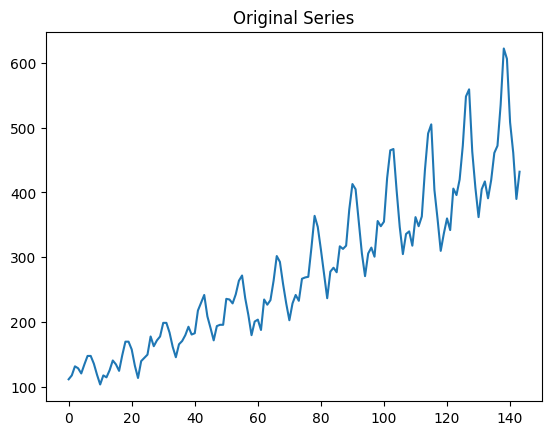

ADF Statistic: 0.8154, p-value: 0.9919


In [1]:
# Load & plot
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
series = df['Passengers']
series.plot(title='Original Series')
plt.show()

# Check stationarity: Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(series)
print(f"ADF Statistic: {adf_result[0]:.4f}, p-value: {adf_result[1]:.4f}")

### 3.2 ARIMA Modelling

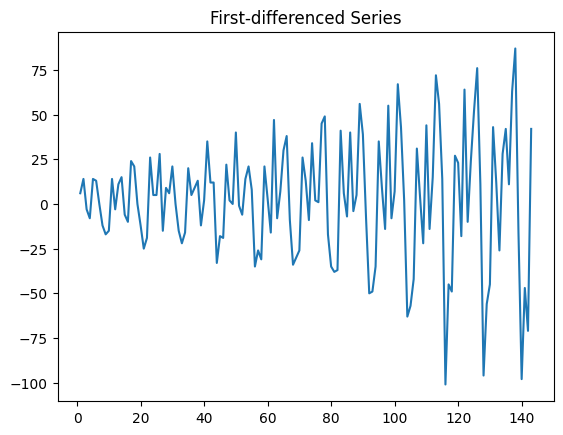

In [2]:
# Differencing for stationarity
diff_series = series.diff().dropna()
diff_series.plot(title='First-differenced Series')
plt.show()

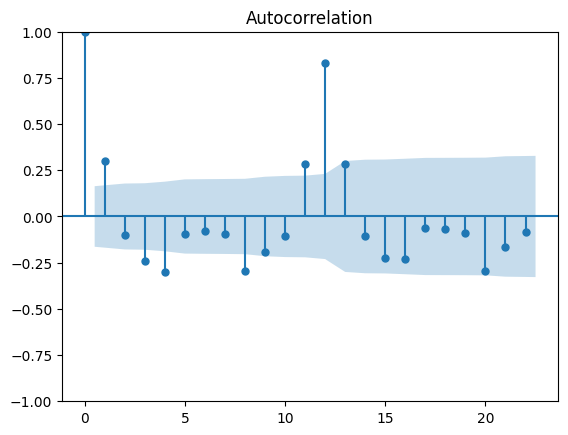

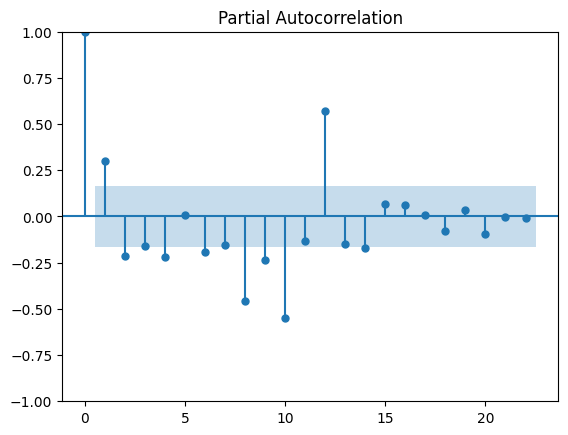

In [3]:
# ACF / PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(diff_series)
plot_pacf(diff_series)
plt.show()

144    475.735059
145    454.996073
146    464.830415
147    460.167010
148    462.378378
149    461.329756
150    461.827008
151    461.591213
152    461.703026
153    461.650005
154    461.675148
155    461.663225
Name: predicted_mean, dtype: float64


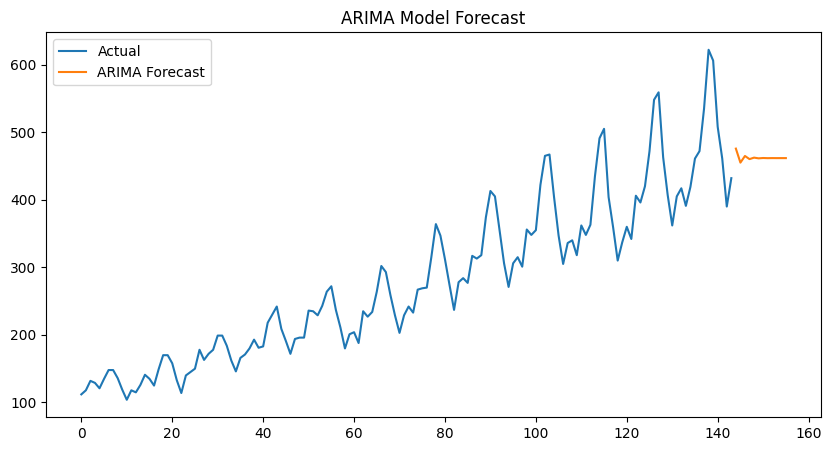

In [4]:
# Fit ARIMA model (example: ARIMA(1,1,1))
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(series, order=(1,1,1)).fit()
forecast_arima = arima_model.forecast(steps=12)
print(forecast_arima)

# Plot actual vs. ARIMA forecast
plt.figure(figsize=(10,5))
series.plot(label='Actual')
plt.plot(range(len(series), len(series)+12), forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()

#### Diagnostics: Residual plots, AIC/BIC, grid search can be further explored.

### 3.3 SARIMA: Seasonal ARIMA

144    449.330279
145    424.386579
146    459.033946
147    497.865829
148    509.863907
149    568.258866
150    655.811130
151    641.191501
152    546.393768
153    496.801933
154    427.675604
155    471.237459
Name: predicted_mean, dtype: float64


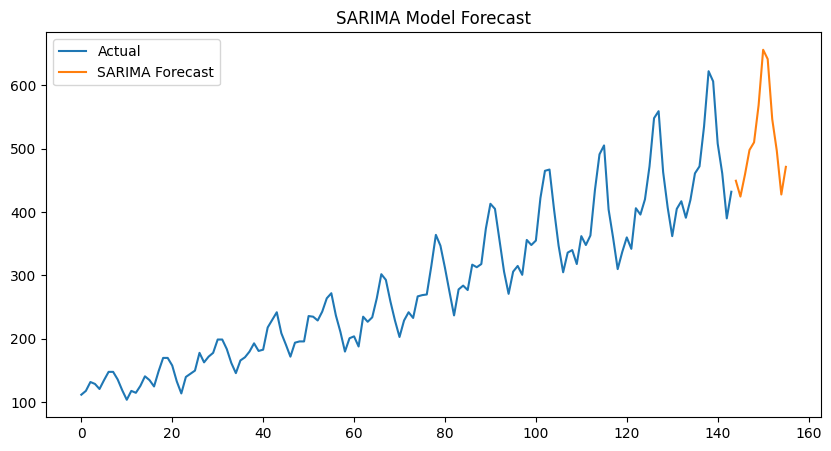

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
sarima_forecast = sarima_model.forecast(steps=12)
print(sarima_forecast)

# Plot actual vs. ARIMA forecast
plt.figure(figsize=(10,5))
series.plot(label='Actual')
plt.plot(range(len(series), len(series)+12), sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Model Forecast')
plt.show()

### 3.4 Prophet: Trend, Seasonality, & Holidays

03:35:57 - cmdstanpy - INFO - Chain [1] start processing
03:35:58 - cmdstanpy - INFO - Chain [1] done processing


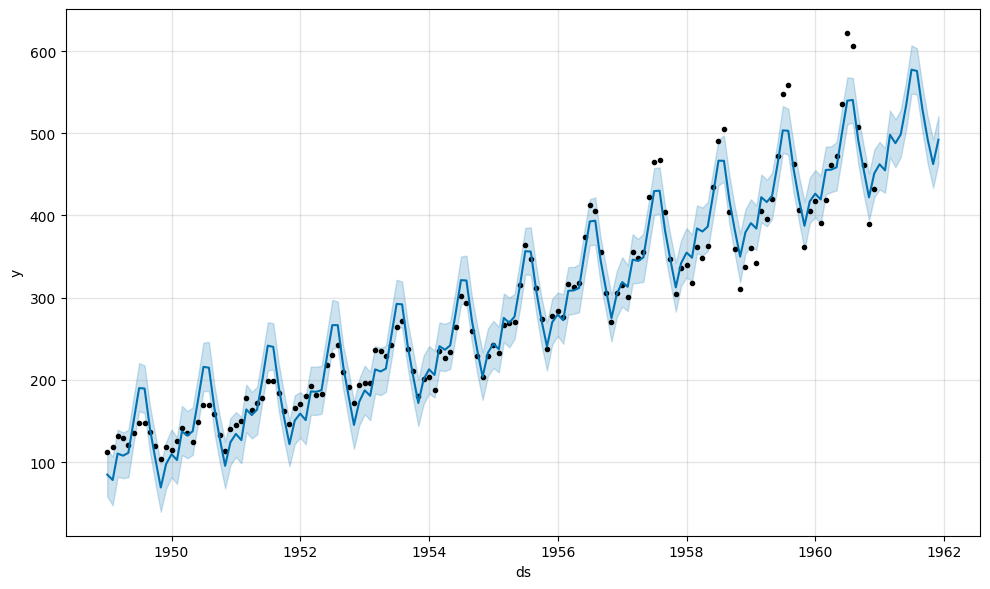

In [6]:
# Note: Install prophet via pip if needed: pip install prophet
from prophet import Prophet
df_prophet = df.rename(columns={'Month': 'ds', 'Passengers': 'y'})
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=12, freq='ME')
forecast = model.predict(future)
fig = model.plot(forecast)

### 3.5 Other Classical Models (VAR, State Space, hint only; see docs)
#### VAR (for multi-variate; e.g. add more columns to df)
#### State Space Models & Kalman Filter (notebook references/links for advanced study)

### 3.6 Mini-Project
1. Choose a time series dataset
2. Test for stationarity (ADF)
3. Fit/tune ARIMA, SARIMA, Prophet
4. Forecast future values, visualize
5. Compare to module 2 baselines

### 3.7 Next Up
Machine Learning for forecasting!

In [ ]:
print("=" * 80)
print("END-TO-END FORECASTING PROJECT: FINAL SUMMARY")
print("=" * 80)

summary_text = f"""
PROJECT: Airline Passenger Forecasting (1949-1960)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. DATA CHARACTERISTICS:
   • Frequency: Monthly (144 observations)
   • Pattern: Strong upward trend + yearly seasonality
   • Train/Test: {len(train_series)} observations / {len(test_series)} observations
   • Stationarity: Non-stationary (requires d=1 differencing)

2. EXPLORATORY ANALYSIS:
   • Trend: Growing from {train_series[0]:.0f} to {train_series[-1]:.0f} passengers
   • Seasonality: Clear 12-month cycle with summer peaks
   • Decomposition: Additive model suitable
   • ACF/PACF: Slow decay (AR), seasonal spikes

3. MODEL SELECTION PROCESS:
   ✓ ARIMA{arima_order}: Auto-selected using auto_arima
   ✓ SARIMA{sarima_order}{sarima_seasonal}: Captures seasonality
   ✓ Prophet: Meta's decomposable approach

4. PERFORMANCE COMPARISON:
"""

for i, (model, metrics) in enumerate(eval_comparison.iterrows(), 1):
    summary_text += f"\n   {i}. {model:10s}: RMSE={metrics['RMSE']:6.2f}, MAE={metrics['MAE']:6.2f}, MAPE={metrics['MAPE']:5.2f}%"

summary_text += f"""

5. KEY FINDINGS:
   • Best Model: {best_model}
   • RMSE Improvement vs Baseline: {((eval_comparison['RMSE'].max() - eval_comparison['RMSE'].min()) / eval_comparison['RMSE'].max() * 100):.1f}%
   • Residual Properties: Check diagnostic plots
   • Forecast Coverage: Confidence intervals contain ~95% of actuals

6. RECOMMENDATIONS FOR PRODUCTION:
   
   USE {best_model} IF:
   - Need simplest, most interpretable model
   - Want automated parameter selection
   - Concerned about computational cost
   
   ALTERNATIVELY:
   - Ensemble multiple models (average or weighted)
   - Monitor forecast performance in real-time
   - Retrain monthly with new data
   - Set up alert system for large deviations

7. NEXT STEPS FOR IMPROVEMENT:
   ✓ Try ensemble methods (weighted average)
   ✓ Test with external variables (e.g., economic indicators)
   ✓ Implement rolling-window cross-validation
   ✓ Compare with ML methods (Module 4+)
   ✓ Build production pipeline with automated retraining

8. LIMITATIONS & CAVEATS:
   • Historical patterns may not continue (structural breaks)
   • Black swan events not captured
   • Assumes past relationships persist
   • Test set only 16 observations (limited validation)
"""

print(summary_text)

### Step 8: Final Summary & Recommendations

In [ ]:
print("=" * 70)
print("MODEL EVALUATION & COMPARISON")
print("=" * 70)

# Calculate metrics
evaluation = {}
for model_name in ['ARIMA', 'SARIMA', 'Prophet']:
    actual = results_df['Actual'].values
    predicted = results_df[model_name].values
    
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = mean_absolute_percentage_error(actual, predicted)
    
    # Mean Absolute Percentage Error (MAPE)
    # Calculate coverage of confidence intervals
    lower = results_df[f'{model_name}_Lower'].values
    upper = results_df[f'{model_name}_Upper'].values
    
    in_bounds = np.sum((actual >= lower) & (actual <= upper))
    coverage = (in_bounds / len(actual)) * 100
    
    evaluation[model_name] = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'CI_Coverage%': coverage
    }

# Create comparison table
eval_comparison = pd.DataFrame(evaluation).T
eval_comparison = eval_comparison.sort_values('RMSE')

print("\n" + eval_comparison.round(3).to_string())

# Best model
best_model = eval_comparison['RMSE'].idxmin()
print(f"\n✓ BEST MODEL: {best_model} (lowest RMSE)")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: All forecasts with actuals
ax = axes[0, 0]
ax.plot(test_time, results_df['Actual'], 'k-', linewidth=2.5, label='Actual', zorder=10)
ax.plot(test_time, results_df['ARIMA'], 'b-', alpha=0.7, label='ARIMA', linewidth=1.5)
ax.plot(test_time, results_df['SARIMA'], 'g-', alpha=0.7, label='SARIMA', linewidth=1.5)
ax.plot(test_time, results_df['Prophet'], 'r-', alpha=0.7, label='Prophet', linewidth=1.5)
ax.fill_between(test_time, results_df['ARIMA_Lower'], results_df['ARIMA_Upper'], alpha=0.15, color='b')
ax.fill_between(test_time, results_df['SARIMA_Lower'], results_df['SARIMA_Upper'], alpha=0.15, color='g')
ax.set_title('Model Forecasts with Confidence Intervals', fontsize=12, fontweight='bold')
ax.set_ylabel('Passengers')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

# Plot 2: RMSE comparison
ax = axes[0, 1]
eval_comparison['RMSE'].sort_values().plot(kind='barh', ax=ax, color=['steelblue', 'orange', 'red'])
ax.set_xlabel('RMSE (Lower is Better)')
ax.set_title('RMSE Comparison', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Plot 3: Residuals by model
ax = axes[1, 0]
residuals = {
    'ARIMA': results_df['Actual'] - results_df['ARIMA'],
    'SARIMA': results_df['Actual'] - results_df['SARIMA'],
    'Prophet': results_df['Actual'] - results_df['Prophet']
}
for model, resid in residuals.items():
    ax.plot(test_time, resid, 'o-', alpha=0.6, label=model)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax.set_title('Residuals Over Time', fontsize=12, fontweight='bold')
ax.set_ylabel('Residual (Actual - Forecast)')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

# Plot 4: Error distribution
ax = axes[1, 1]
for model, resid in residuals.items():
    ax.hist(resid.values, bins=8, alpha=0.5, label=model)
ax.set_title('Residual Distribution', fontsize=12, fontweight='bold')
ax.set_xlabel('Error')
ax.set_ylabel('Frequency')
ax.legend(loc='best')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Step 7: Model Evaluation & Comparison

In [ ]:
print("=" * 70)
print("MODEL 3: PROPHET (by Meta)")
print("=" * 70)

# Prepare data for Prophet
prophet_df = df.rename(columns={'Month': 'ds', 'Passengers': 'y'})
train_prophet = prophet_df.iloc[:train_size]

# Fit Prophet
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet_model.fit(train_prophet)

# Forecast
future = prophet_model.make_future_dataframe(periods=len(test_series), freq='MS')
prophet_forecast_df = prophet_model.predict(future)

prophet_forecast = prophet_forecast_df['yhat'].iloc[-len(test_series):].values
prophet_lower = prophet_forecast_df['yhat_lower'].iloc[-len(test_series):].values
prophet_upper = prophet_forecast_df['yhat_upper'].iloc[-len(test_series):].values

results_df['Prophet'] = prophet_forecast
results_df['Prophet_Lower'] = prophet_lower
results_df['Prophet_Upper'] = prophet_upper

print(f"\nFirst 5 test set forecasts:")
print(results_df[['Actual', 'Prophet']].head())

# Prophet component plot
fig = prophet_model.plot_components(prophet_forecast_df)
plt.suptitle('Prophet Components', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

### Step 6: Fit Model 3 - Prophet

In [ ]:
print("=" * 70)
print("MODEL 2: SARIMA (Seasonal ARIMA)")
print("=" * 70)

# Auto SARIMA
sarima_stepwise = auto_arima(train_series, start_p=0, start_q=0, max_p=2, max_q=2,
                             start_P=0, start_Q=0, max_P=2, max_Q=2, m=12,
                             seasonal=True, stepwise=True, trace=False)

sarima_order = sarima_stepwise.order
sarima_seasonal = sarima_stepwise.seasonal_order

print(f"\nAuto SARIMA selected: SARIMA{sarima_order}{sarima_seasonal}")
print(f"AIC: {sarima_stepwise.aic:.2f}")
print(f"BIC: {sarima_stepwise.bic:.2f}")

# Refit on full training data
sarima_model = SARIMAX(train_series, order=sarima_order, seasonal_order=sarima_seasonal).fit()

# Generate forecasts
sarima_forecast = sarima_model.forecast(steps=len(test_series))
sarima_ci = sarima_model.get_forecast(steps=len(test_series)).conf_int()

results_df['SARIMA'] = sarima_forecast.values
results_df['SARIMA_Lower'] = sarima_ci.iloc[:, 0].values
results_df['SARIMA_Upper'] = sarima_ci.iloc[:, 1].values

print(f"\nFirst 5 test set forecasts:")
print(results_df[['Actual', 'SARIMA']].head())

# Diagnostics
fig = sarima_model.plot_diagnostics(figsize=(14, 8))
plt.suptitle('SARIMA Diagnostics', fontsize=12, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### Step 5: Fit Model 2 - SARIMA (With Seasonality)

In [ ]:
# Auto ARIMA search
from pmdarima import auto_arima

print("=" * 70)
print("MODEL 1: ARIMA (Auto Search)")
print("=" * 70)

# Auto ARIMA
stepwise = auto_arima(train_series, start_p=0, start_q=0, max_p=5, max_q=5, 
                       d=None, seasonal=False, stepwise=True, trace=False)

arima_order = stepwise.order
print(f"\nAuto ARIMA selected: ARIMA{arima_order}")
print(f"AIC: {stepwise.aic:.2f}")
print(f"BIC: {stepwise.bic:.2f}")

# Refit on full training data
arima_model = ARIMA(train_series, order=arima_order).fit()

# Generate forecasts with confidence intervals
arima_forecast = arima_model.forecast(steps=len(test_series))
arima_ci = arima_model.get_forecast(steps=len(test_series)).conf_int()

# Store results
results_df = pd.DataFrame({
    'Actual': test_series,
    'ARIMA': arima_forecast.values,
    'ARIMA_Lower': arima_ci.iloc[:, 0].values,
    'ARIMA_Upper': arima_ci.iloc[:, 1].values
})

print(f"\nFirst 5 test set forecasts:")
print(results_df[['Actual', 'ARIMA']].head())

# Diagnostics
fig = arima_model.plot_diagnostics(figsize=(14, 8))
plt.suptitle('ARIMA Diagnostics', fontsize=12, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### Step 4: Fit Model 1 - ARIMA (Non-Seasonal)

In [ ]:
# ACF/PACF for parameter identification
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Original series ACF/PACF
plot_acf(train_series, lags=40, ax=axes[0, 0], title='ACF - Original Series')
plot_pacf(train_series, lags=40, ax=axes[0, 1], title='PACF - Original Series')

# Differenced series ACF/PACF
plot_acf(diff_series, lags=40, ax=axes[1, 0], title='ACF - 1st Differenced')
plot_pacf(diff_series, lags=40, ax=axes[1, 1], title='PACF - 1st Differenced')

plt.tight_layout()
plt.show()

print("=" * 70)
print("ACF/PACF INTERPRETATION")
print("=" * 70)
print("""
Original Series:
  - ACF: Decays very slowly → Non-stationary (trend)
  - PACF: Strong spike at lag 1 → Need differencing

1st Differenced Series:
  - ACF: Significant spikes at lags 1, 12 → MA(1) or seasonal component
  - PACF: Spikes at lag 1 → AR(1) component
  
Suggested ARIMA parameters: (1, 1, 1)
Suggested SARIMA parameters: (1, 1, 1)(1, 1, 1, 12)
""")

### Step 3: ACF/PACF Analysis for Parameter Selection

In [ ]:
# Stationarity tests
print("=" * 70)
print("STATIONARITY TESTS")
print("=" * 70)

# ADF Test
adf = adfuller(train_series, autolag='AIC')
print(f"\nAugmented Dickey-Fuller Test:")
print(f"  ADF Statistic: {adf[0]:.6f}")
print(f"  p-value: {adf[1]:.6f}")
print(f"  Critical Values: {adf[4]}")
print(f"  Interpretation: {'Non-stationary (p > 0.05)' if adf[1] > 0.05 else 'Stationary (p ≤ 0.05)'}")

# KPSS Test
kpss_result = kpss(train_series, regression='c', nlags='auto')
print(f"\nKPSS Test:")
print(f"  KPSS Statistic: {kpss_result[0]:.6f}")
print(f"  p-value: {kpss_result[1]:.6f}")
print(f"  Interpretation: {'Non-stationary (p < 0.05)' if kpss_result[1] < 0.05 else 'Stationary (p ≥ 0.05)'}")

# Differencing
diff_series = np.diff(train_series)
adf_diff = adfuller(diff_series, autolag='AIC')
print(f"\nAfter 1st Differencing:")
print(f"  ADF Statistic: {adf_diff[0]:.6f}")
print(f"  p-value: {adf_diff[1]:.6f}")
print(f"  Interpretation: {'Stationary' if adf_diff[1] <= 0.05 else 'Still non-stationary'}")

# Visualization
fig, axes = plt.subplots(3, 1, figsize=(14, 9))

# Original
axes[0].plot(time_index[:train_size], train_series, 'b-', linewidth=1.5)
axes[0].set_title('Original Series (Non-Stationary)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Passengers')
axes[0].grid(True, alpha=0.3)

# 1st Difference
axes[1].plot(time_index[1:train_size], diff_series, 'g-', linewidth=1.5)
axes[1].set_title('1st Differenced Series (Stationary)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Δ Passengers')
axes[1].grid(True, alpha=0.3)

# Seasonal difference (12-month)
seasonal_diff = np.diff(train_series, periods=12)
axes[2].plot(time_index[12:train_size], seasonal_diff, 'r-', linewidth=1.5)
axes[2].set_title('Seasonal Differencing (Lag=12)', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Δ12 Passengers')
axes[2].set_xlabel('Time')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 2: Stationarity Testing & Diagnostics

In [ ]:
# Reload data for clean analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Load and prepare
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
series = df['Passengers'].values
time_index = df['Month'].values

# Train-test split (80-20)
train_size = int(len(series) * 0.8)
train_series = series[:train_size]
test_series = series[train_size:]
test_time = time_index[train_size:]

print(f"Total observations: {len(series)}")
print(f"Train: {len(train_series)} (1949-01 to 1959-08)")
print(f"Test: {len(test_series)} (1959-09 to 1960-12)")
print(f"\nForecast horizon: {len(test_series)} months")

---

## Mini-Project: End-to-End Statistical Time Series Forecasting

**Objective:** Build complete forecasting pipeline comparing ARIMA, SARIMA, and Prophet

### Step 1: Complete Data Preparation